# Kernel Density Estimation Examples
PHYS 453 - Class 2/21/2020

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

## 1D Gaussian

In [2]:
g1 = np.random.normal(loc=10, scale=1, size=100)
print(g1[:10])

[ 9.93232373 12.35454469 11.72072738  8.34409002  9.34074292  7.97280645
 10.97217385  9.27606881 10.82627254 10.0621028 ]


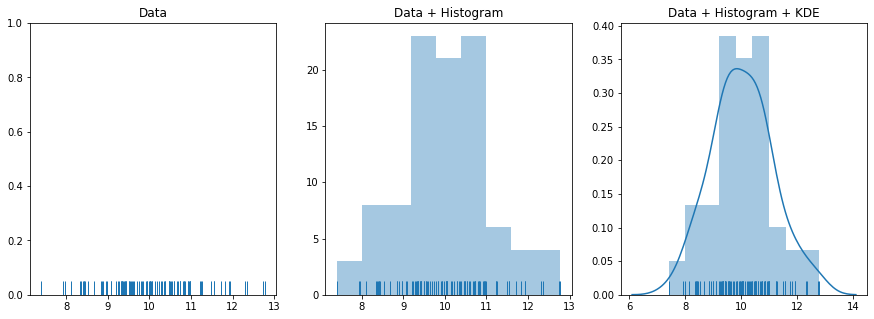

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.rugplot(g1)
plt.title('Data')

plt.subplot(1,3,2)
sns.distplot(g1, kde=False, rug=True)
plt.title('Data + Histogram')

plt.subplot(1,3,3)
sns.distplot(g1, rug=True)
plt.title('Data + Histogram + KDE')

plt.show()

Seaborn does a nice job of giving us histograms and probability functions ("kernels").  Unfortunately, we can't get access to these fits to use.  When people ask for this feature the developer acts like a total jerk. 

Text(0.5, 1.0, 'Comparison to Truth')

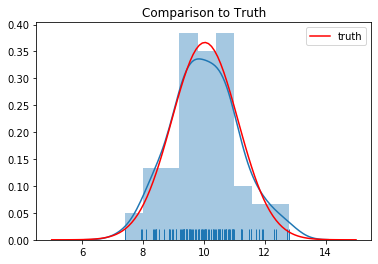

In [4]:
gfit = norm(g1.mean(), g1.std())

plt.figure()

sns.distplot(g1, rug=True)

x = np.linspace(5,15, num=100)
y = gfit.pdf(x)

plt.plot(x,y, 'r-',label='truth')
plt.legend()
plt.title('Comparison to Truth')

## 2D Gaussian

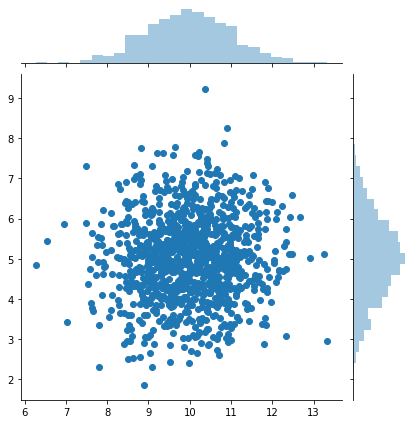

In [5]:
NUM = 1000
x = np.random.normal(loc=(10,5), size=(NUM,2))

sns.jointplot(x[:,0],x[:,1])
plt.show()

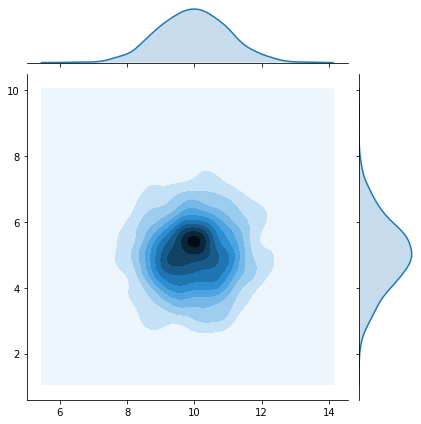

In [6]:
sns.jointplot(x[:,0],x[:,1],kind='kde')
plt.show()

Text(0.5, 1, 'Iris Data')

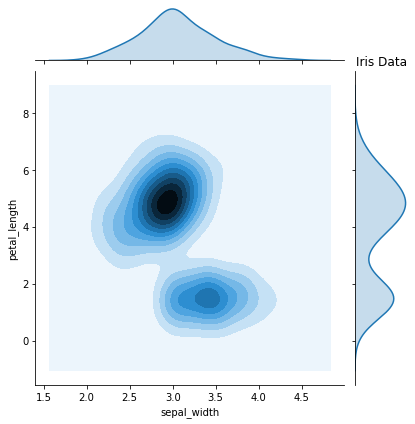

In [7]:
iris = sns.load_dataset("iris")
sns.jointplot("sepal_width", "petal_length", data=iris,kind="kde")  
plt.title("Iris Data")

# SKLEARN Kernel Density Example

https://scikit-learn.org/stable/modules/density.html

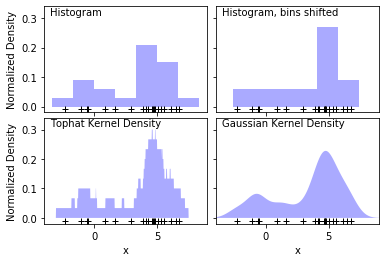

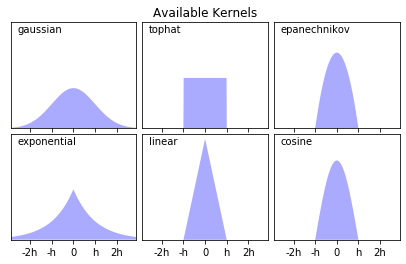

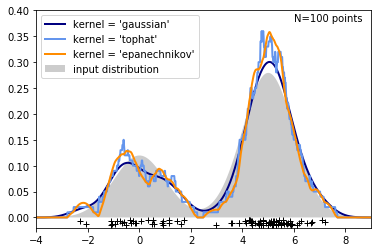

In [8]:
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

# SKLEARN - MY EXAMPLES

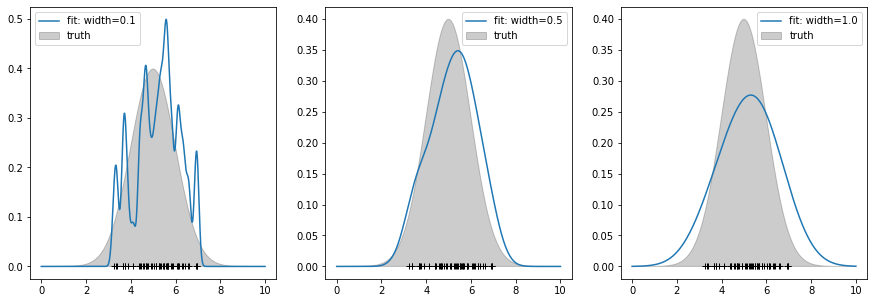

In [9]:
mean = 5
stdev = 1
X_train = np.random.normal(loc=mean, scale=stdev, size=(50,1))

X_plot = np.linspace(0, 10,num=1000).reshape(-1,1)  # make a 2D array
y_true = norm(mean, stdev).pdf(X_plot)

plt.figure(figsize=(15,5))
widths = [0.1, 0.5, 1.0]
for i,w in enumerate(widths):
    plt.subplot(1,3,i+1)
    
    plt.plot(X_train, np.zeros_like(X_train),'k+')

    plt.fill(X_plot,y_true,c='black', alpha=0.2, label='truth')

    kde = KernelDensity(bandwidth=w)
    kde.fit(X_train)
    log_dens = kde.score_samples(X_plot)
    plt.plot(X_plot, np.exp(log_dens), label=f'fit: width={w}')

    plt.legend()
plt.show()

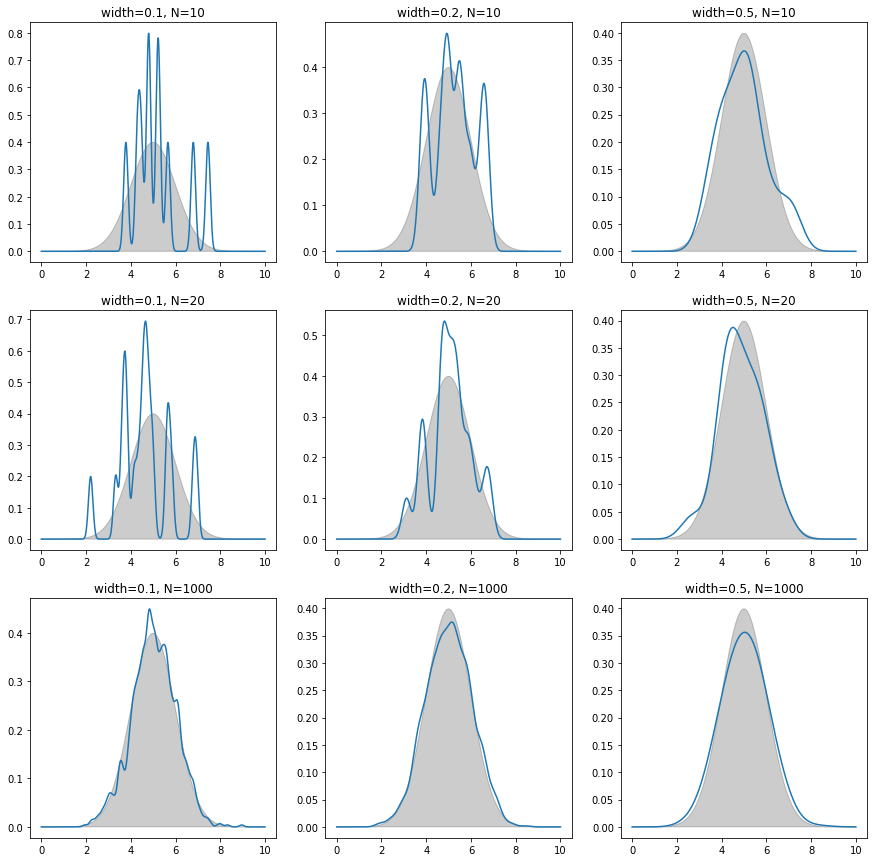

In [10]:
mean = 5
stdev = 1

X_plot = np.linspace(0, 10,num=1000).reshape(-1,1)  # make a 2D array
y_true = norm(mean, stdev).pdf(X_plot)

plt.figure(figsize=(15,15))
widths = [0.1, 0.2, 0.5]
N = [10,20, 1000]

for i,w in enumerate(widths):
    for j,n in enumerate(N):
        plt.subplot(3,3,i+3*j+1)
        plt.fill(X_plot,y_true,c='black', alpha=0.2, label='truth')
        X_train = np.random.normal(loc=mean, scale=stdev, size=(n,1))
        kde = KernelDensity(bandwidth=w)
        kde.fit(X_train)
        log_dens = kde.score_samples(X_plot)
        plt.plot(X_plot, np.exp(log_dens), label=f'w={w}, N={n}')
        #plt.legend()
        plt.title(f'width={w}, N={n}')
plt.show()

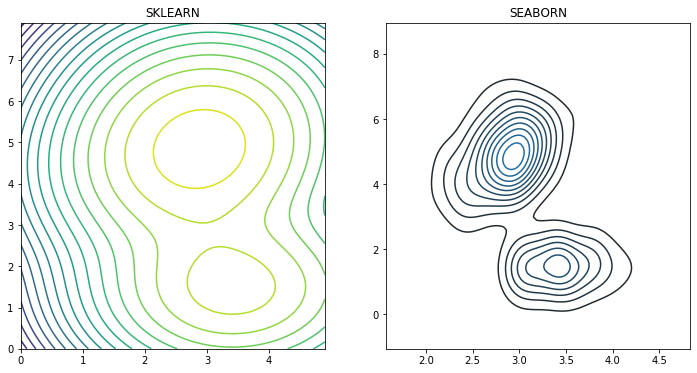

In [19]:
#plt.figure(figsize=(12,6))
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

X = iris[['sepal_width','petal_length']].values
kde = KernelDensity()
kde.fit(X)

# Make a meshgrid (using decision boundary code as a start) to show plot
h= 0.1
margin = 0.5
x_min = 0
x_max = 5
y_min = 0
y_max = 8

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kde.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(ax1)
plt.contour(xx, yy, Z,levels=20) #cmap=cmap)
plt.title('SKLEARN')

plt.subplot(ax2)
sns.kdeplot(X[:,0], X[:,1],ax=ax2)
plt.title('SEABORN')

plt.show()